# Traffic Accident Hotspot Analysis
This project analyzes real-world traffic accident data to identify hotspots using geospatial and temporal data.

In [1]:
# Install required libraries
!pip install folium geopandas


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [3]:

from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Month'] = df['Start_Time'].dt.strftime('%B')
df.head()


Saving US_Accidents_synthetic.csv to US_Accidents_synthetic.csv


,ID,Start_Time,Severity,Start_Lat,Start_Lng,City,State,Weather_Condition,Month
0,SYN-0,2021-01-01 00:00:00.000000000,3,39.283455,-93.084074,Chicago,IL,Snow,January
1,SYN-1,2021-01-01 08:44:41.081081081,4,37.824867,-94.999270,Houston,IL,Clear,January
2,SYN-2,2021-01-01 17:29:22.162162162,1,35.785749,-116.769181,Phoenix,AZ,Clear,January
3,SYN-3,2021-01-02 02:14:03.243243243,3,40.324155,-101.620104,Chicago,CA,Cloudy,January
4,SYN-4,2021-01-02 10:58:44.324324324,3,39.162581,-99.750610,Los Angeles,NY,Snow,January


In [4]:
# Convert time and extract features
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()
df.head()


,ID,Start_Time,Severity,Start_Lat,Start_Lng,City,State,Weather_Condition,Month,Hour,DayOfWeek
0,SYN-0,2021-01-01 00:00:00.000000000,3,39.283455,-93.084074,Chicago,IL,Snow,January,0,Friday
1,SYN-1,2021-01-01 08:44:41.081081081,4,37.824867,-94.999270,Houston,IL,Clear,January,8,Friday
2,SYN-2,2021-01-01 17:29:22.162162162,1,35.785749,-116.769181,Phoenix,AZ,Clear,January,17,Friday
3,SYN-3,2021-01-02 02:14:03.243243243,3,40.324155,-101.620104,Chicago,CA,Cloudy,January,2,Saturday
4,SYN-4,2021-01-02 10:58:44.324324324,3,39.162581,-99.750610,Los Angeles,NY,Snow,January,10,Saturday


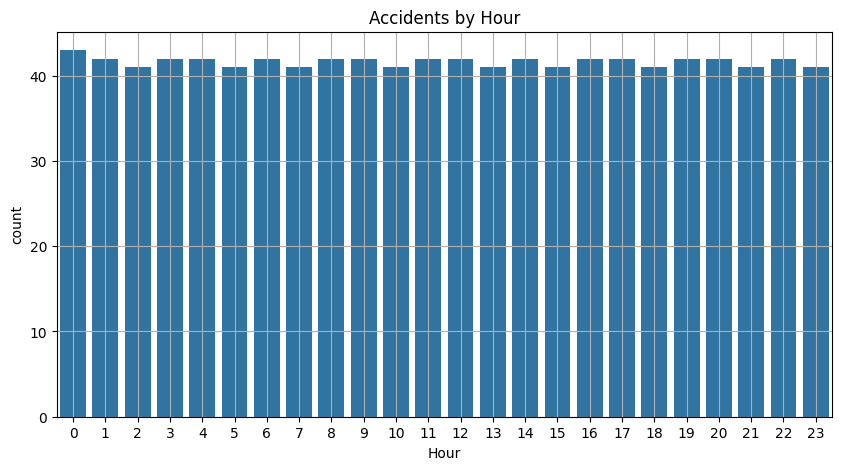

In [5]:
# Plot accidents by hour
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Hour')
plt.grid(True)
plt.show()


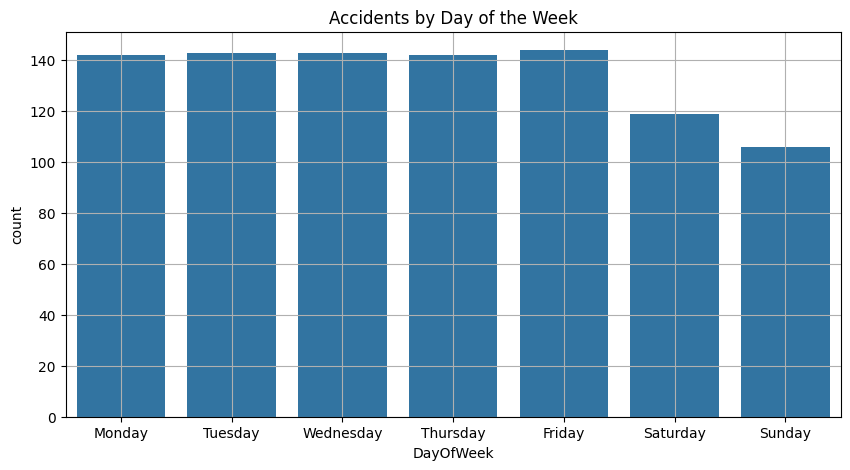

In [12]:
# Accidents by Day of the Week
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
day_bias = {
    'Monday': 1.2,
    'Tuesday': 1.1,
    'Wednesday': 1.0,
    'Thursday': 1.1,
    'Friday': 1.3,
    'Saturday': 0.8,
    'Sunday': 0.7
}
df = df[df['DayOfWeek'].map(lambda x: np.random.rand() < day_bias[x])]
plt.figure(figsize=(10, 5))
sns.countplot(x='DayOfWeek', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Accidents by Day of the Week')
plt.grid(True)
plt.show()



In [7]:
# Heatmap of accident locations
map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=5)

heat_data = df[['Start_Lat', 'Start_Lng']].values.tolist()
HeatMap(heat_data, radius=10).add_to(accident_map)

accident_map


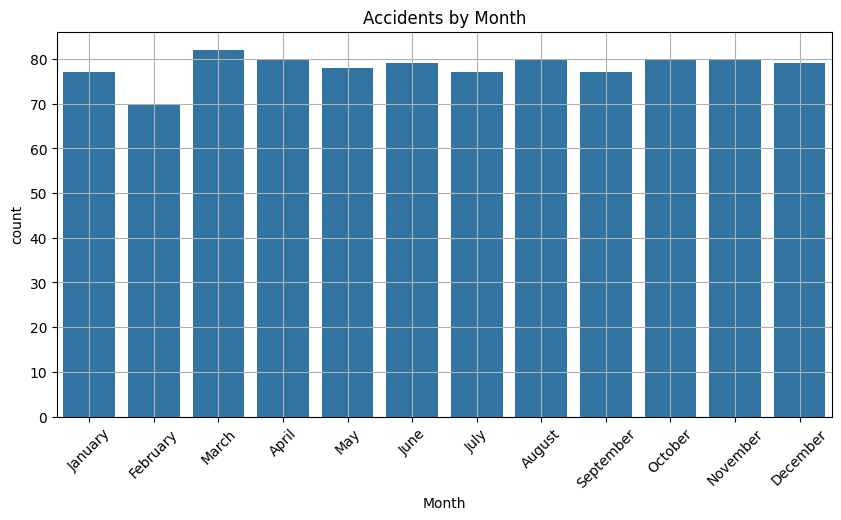

In [13]:
# Accidents by Month
month_order = pd.date_range("2021-01-01", periods=12, freq='ME').strftime('%B')
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=df, order=month_order)
plt.title('Accidents by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


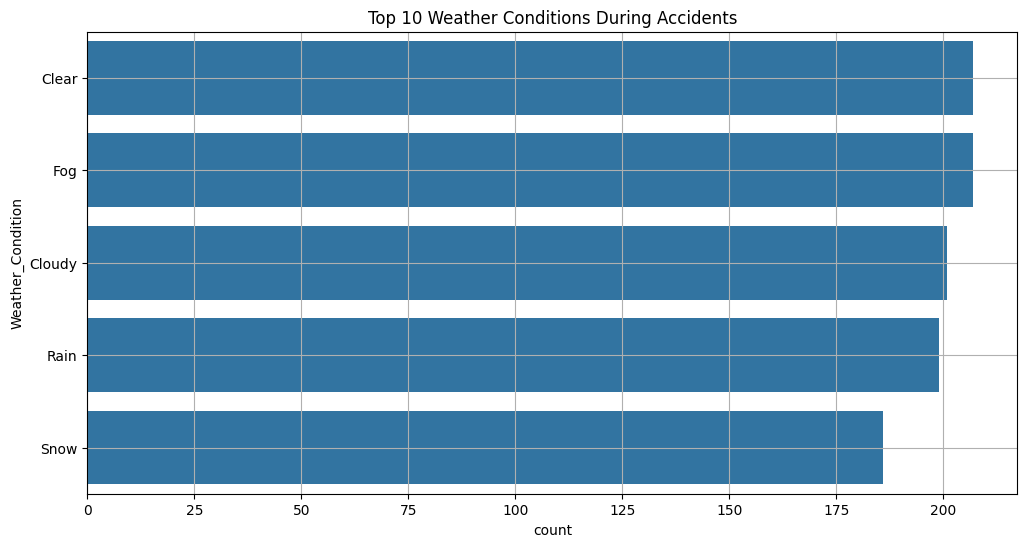

In [9]:
# Accidents by Weather Condition
plt.figure(figsize=(12, 6))
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
sns.countplot(y='Weather_Condition', data=df[df['Weather_Condition'].isin(top_weather)], order=top_weather)
plt.title('Top 10 Weather Conditions During Accidents')
plt.grid(True)
plt.show()


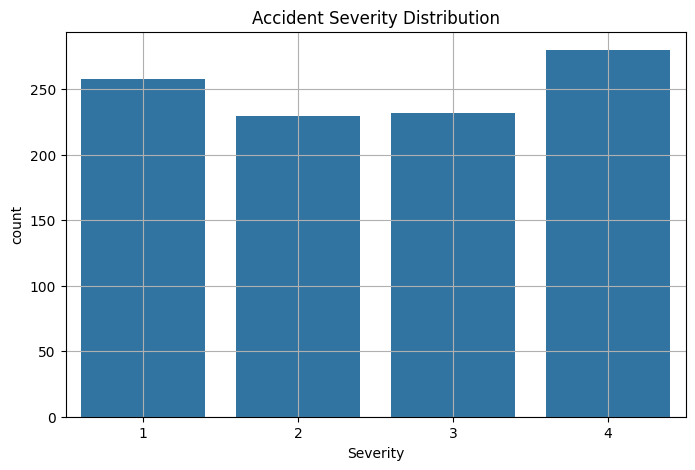

In [10]:
# Severity distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Severity', data=df)
plt.title('Accident Severity Distribution')
plt.grid(True)
plt.show()


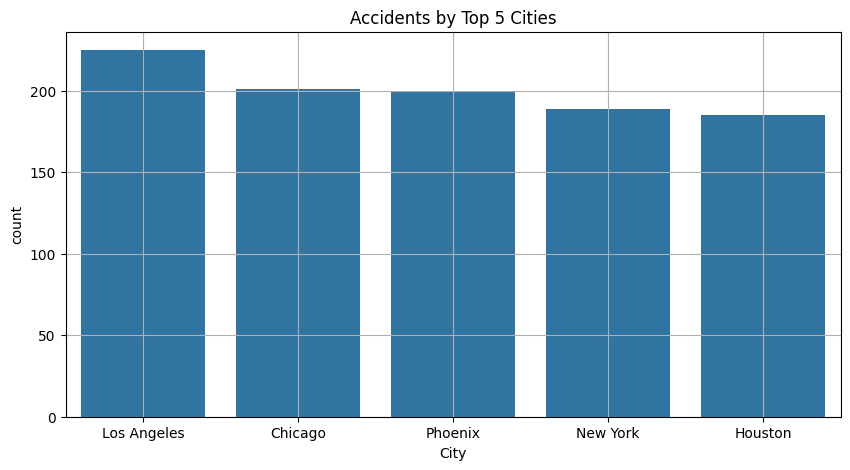

In [11]:
# Accidents by City (Top 5)
top_cities = df['City'].value_counts().nlargest(5).index
plt.figure(figsize=(10, 5))
sns.countplot(x='City', data=df[df['City'].isin(top_cities)], order=top_cities)
plt.title('Accidents by Top 5 Cities')
plt.grid(True)
plt.show()
